In [47]:
import pandas as pd

this note book is created to read the predictions of Falcon and convert it back to 0's and 1's. We can calculate the accuracy of the model.

In [48]:
df = pd.read_csv('test.csv')

In [49]:
df.head()

,Unnamed: 0,merged_review
0,29153,this review is about the staff at this locatio...
1,30570,worst experience ever. customer service is the...
2,23381,disappointing. mcdonalds is my standby for fas...
3,23825,we went here for breakfast. the place could ha...
4,1398,good->:positive


In [50]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [51]:
df.head()

,merged_review
0,this review is about the staff at this locatio...
1,worst experience ever. customer service is the...
2,disappointing. mcdonalds is my standby for fas...
3,we went here for breakfast. the place could ha...
4,good->:positive


In [52]:
df['text'] = df['merged_review'].apply(lambda x: x.split('->:')[0])

In [53]:
df['review'] = df['merged_review'].apply(lambda x: 1 if x.split('->:')[1] == 'positive' else 0)

In [54]:
df.head()

,merged_review,text,review
0,this review is about the staff at this locatio...,this review is about the staff at this locatio...,0
1,worst experience ever. customer service is the...,worst experience ever. customer service is the...,0
2,disappointing. mcdonalds is my standby for fas...,disappointing. mcdonalds is my standby for fas...,0
3,we went here for breakfast. the place could ha...,we went here for breakfast. the place could ha...,0
4,good->:positive,good,1


In [55]:
df.drop(['merged_review'], axis=1, inplace = True)

In [56]:
df.head()

,text,review
0,this review is about the staff at this locatio...,0
1,worst experience ever. customer service is the...,0
2,disappointing. mcdonalds is my standby for fas...,0
3,we went here for breakfast. the place could ha...,0
4,good,1


In [57]:
df = df.iloc[:1000]

In [60]:
with open('0to250.csv','r') as f:
    rawText = f.read() 

In [63]:
review = []
sentiment = []
rw = rawText.split('][')
for i in range(250):
    review.append(rw[i].split('->')[0][4:])
    sentiment.append(rw[i].split('->')[1][:8])


In [68]:
with open('250to500.csv','r') as f:
    rawText = f.read() 
rw = rawText.split('][')
for i in range(250):
    review.append(rw[i].split('->')[0][4:])
    sentiment.append(rw[i].split('->')[1][:8])

In [69]:
len(sentiment)

500

In [70]:
with open('500to750.csv','r') as f:
    rawText = f.read() 
rw = rawText.split('][')
for i in range(250):
    review.append(rw[i].split('->')[0][4:])
    sentiment.append(rw[i].split('->')[1][:8])

In [71]:
with open('750to1000.csv','r') as f:
    rawText = f.read() 
rw = rawText.split('][')
for i in range(250):
    review.append(rw[i].split('->')[0][4:])
    sentiment.append(rw[i].split('->')[1][:8])

In [82]:
pred_df = pd.DataFrame({'review': review, 'sentiment': sentiment}, index=range(1000))


In [83]:
pred_df.head()

,review,sentiment
0,'this review is about the staff at this locati...,negative
1,worst experience ever. customer service is the...,negative
2,disappointing. mcdonalds is my standby for fas...,negative
3,we went here for breakfast. the place could ha...,negative
4,good,positive


In [84]:
pred_df['predictedBinarySentiment'] = pred_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [85]:
pred_df

,review,sentiment,predictedBinarySentiment
0,'this review is about the staff at this locati...,negative,0
1,worst experience ever. customer service is the...,negative,0
2,disappointing. mcdonalds is my standby for fas...,negative,0
3,we went here for breakfast. the place could ha...,negative,0
4,good,positive,1
...,...,...,...
995,'some days the service is fast and others it ...,positive,1
996,'excellent,positive,1
997,'nice place to eat,positive,1
998,'great customer service,positive,1


In [86]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_actual = df['review'].values
y_predicted = pred_df['predictedBinarySentiment'].values
cm = confusion_matrix(y_actual, y_predicted)
precision = precision_score(y_actual, y_predicted)
recall = recall_score(y_actual, y_predicted)
accuracy = accuracy_score(y_actual, y_predicted)

print(f"Confusion Matrix:\n{cm}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")


Confusion Matrix:
[[501   0]
 [  0 499]]
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


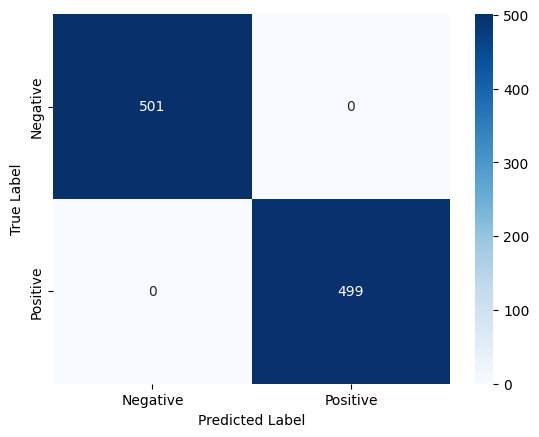

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy of the model is remarkable. It is giving 100% accuracy. We cannot say it as overfitting as the base model is already trained on 7B params.